<a href="https://colab.research.google.com/github/mffg1993/TopicsInOptics/blob/main/DiffractionGratings/Introduction_to_Diffraction_Gratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparison between different types of gratings**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as FFT


def BlazedGrating(grating_period,wavelength = 633e-9,sampling_points = 1000):

    grating_length = 10 * grating_period  # Total length of the grating

    # Spatial domain
    x = np.linspace(-grating_length / 2, grating_length / 2, sampling_points)
    sawtooth_wave = (x % grating_period) / grating_period  # Blazed grating

    # Fourier Transform
    fft_result = FFT.fft(sawtooth_wave)
    fft_amplitude = np.abs(fft_result)
    fft_phase = np.angle(fft_result)
    frequencies = FFT.fftfreq(sampling_points, d=(x[1] - x[0]))

    # Shift FFT for symmetric representation
    fft_amplitude = FFT.fftshift(fft_amplitude)
    fft_phase = FFT.fftshift(fft_phase)
    frequencies = FFT.fftshift(frequencies)

    return([x,sawtooth_wave,frequencies,fft_amplitude,fft_phase])


def SineGrating(grating_period,wavelength = 633e-9,sampling_points = 1000):

    grating_length = 10 * grating_period  # Total length of the grating

    # Spatial domain
    x = np.linspace(-grating_length / 2, grating_length / 2, sampling_points)
    sinusoidal_wave = 0.5 * (1 + np.sin(2 * np.pi * x / grating_period))  # Sinusoidal grating

    # Fourier Transform
    fft_result = FFT.fft(sinusoidal_wave)
    fft_amplitude = np.abs(fft_result)
    fft_phase = np.angle(fft_result)
    frequencies = FFT.fftfreq(sampling_points, d=(x[1] - x[0]))

    # Shift FFT for symmetric representation
    fft_amplitude = FFT.fftshift(fft_amplitude)
    fft_phase = FFT.fftshift(fft_phase)
    frequencies = FFT.fftshift(frequencies)

    return([x,sinusoidal_wave,frequencies,fft_amplitude,fft_phase])



def SquareGrating(grating_period,wavelength = 633e-9,sampling_points = 1000):

    grating_length = 10 * grating_period  # Total length of the grating

    # Spatial domain
    x = np.linspace(-grating_length / 2, grating_length / 2, sampling_points)
    square_wave = 0.5+0.5*np.sign(np.sin(2 * np.pi * x / grating_period))  # Square wave grating

    # Fourier Transform
    fft_result = FFT.fft(square_wave)
    fft_amplitude = np.abs(fft_result)
    fft_phase = np.angle(fft_result)
    frequencies = FFT.fftfreq(sampling_points, d=(x[1] - x[0]))

    # Shift FFT for symmetric representation
    fft_amplitude = FFT.fftshift(fft_amplitude)
    fft_phase = FFT.fftshift(fft_phase)
    frequencies = FFT.fftshift(frequencies)

    return([x,square_wave,frequencies,fft_amplitude,fft_phase])


def GratingPlot(info,title):
    x = info[0]
    grating = info[1]
    frequencies = info[2]
    fft_amplitude = info[3]
    fft_phase = info[4]

        # Plot the results
    plt.figure(figsize=(12, 8))

    # Original signal
    plt.subplot(3, 1, 1)
    plt.plot(x, grating)
    plt.title(title)
    plt.xlabel("Position (m)")
    plt.ylabel("Amplitude")
    plt.grid()

    # FFT Amplitude
    plt.subplot(3, 1, 2)
    plt.plot(frequencies, fft_amplitude, label="FFT Amplitude")
    plt.title("Fourier Transform - Amplitude")
    plt.xlabel("Spatial Frequency (1/m)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    # FFT Phase
    plt.subplot(3, 1, 3)
    plt.plot(frequencies, fft_phase, label="FFT Phase")
    plt.title("Fourier Transform - Phase")
    plt.xlabel("Spatial Frequency (1/m)")
    plt.ylabel("Phase (radians)")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()





## **Blazed Grating**

A **blazed grating** is a type of diffraction grating engineered to maximize the diffraction efficiency in a specific direction or order. Unlike standard gratings, which have evenly spaced grooves with uniform cross-sections, a blazed grating features grooves with a sawtooth profile. This asymmetrical design causes incident light to reflect at angles that enhance constructive interference in the desired diffraction order.

The key characteristic of a blazed grating is its **blaze angle**, which determines the direction in which the diffracted light is most efficiently concentrated. This makes blazed gratings particularly useful in applications requiring high efficiency, such as spectrometers, monochromators, and optical telecommunications.

### **Features:**
- **Efficiency**: Maximizes diffraction efficiency for a specific wavelength and order.
- **Design**: Sawtooth groove profile tailored for a targeted wavelength range.
- **Applications**: Spectroscopy, laser tuning, and optical filtering.

Blazed gratings are widely employed in optical systems to selectively direct light with minimal loss, optimizing performance in their intended wavelength range.

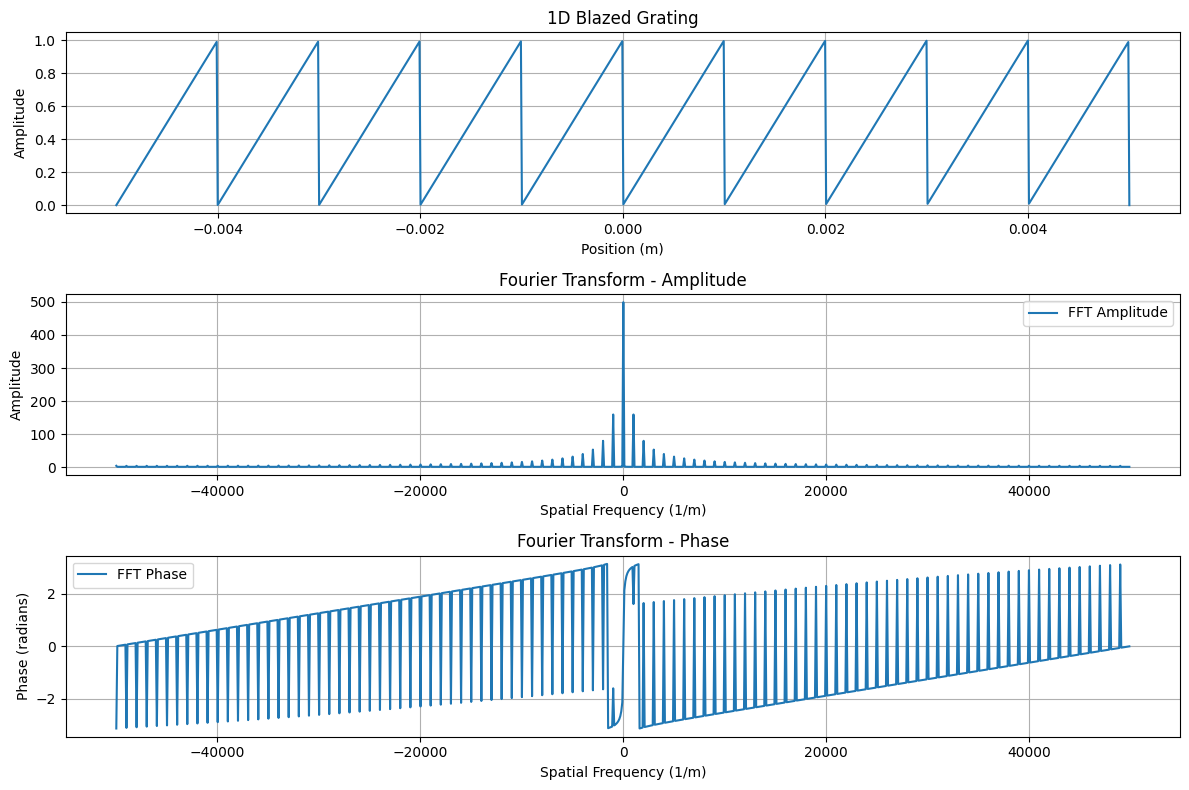

In [ ]:
grating_period = 1e-3  # meters (1 mm period)

BG=BlazedGrating(grating_period)
GratingPlot(BG,"1D Blazed Grating")

## **Sinusoidal Grating**

A **sinusoidal grating** is a diffraction grating where the surface modulation follows a smooth sinusoidal pattern. Unlike other gratings with sharp edges or angular grooves, a sinusoidal grating has a continuous, wave-like profile, producing a distinctive diffraction pattern with well-defined intensity distributions.

The smooth periodic structure of a sinusoidal grating primarily diffracts light into the first-order diffraction mode, with higher orders receiving significantly reduced intensity. This makes sinusoidal gratings particularly useful in applications requiring precise control over diffraction efficiency and minimal higher-order contributions.

### **Features:**
- **Profile**: Smooth sinusoidal modulation of the surface.
- **Diffraction Characteristics**: Concentrates most of the energy in the first diffraction order.
- **Applications**: Beam shaping, holography, and optical testing.

Sinusoidal gratings are ideal for applications demanding low harmonic distortion and efficient energy distribution into specific diffraction orders, making them valuable in high-precision optical systems.

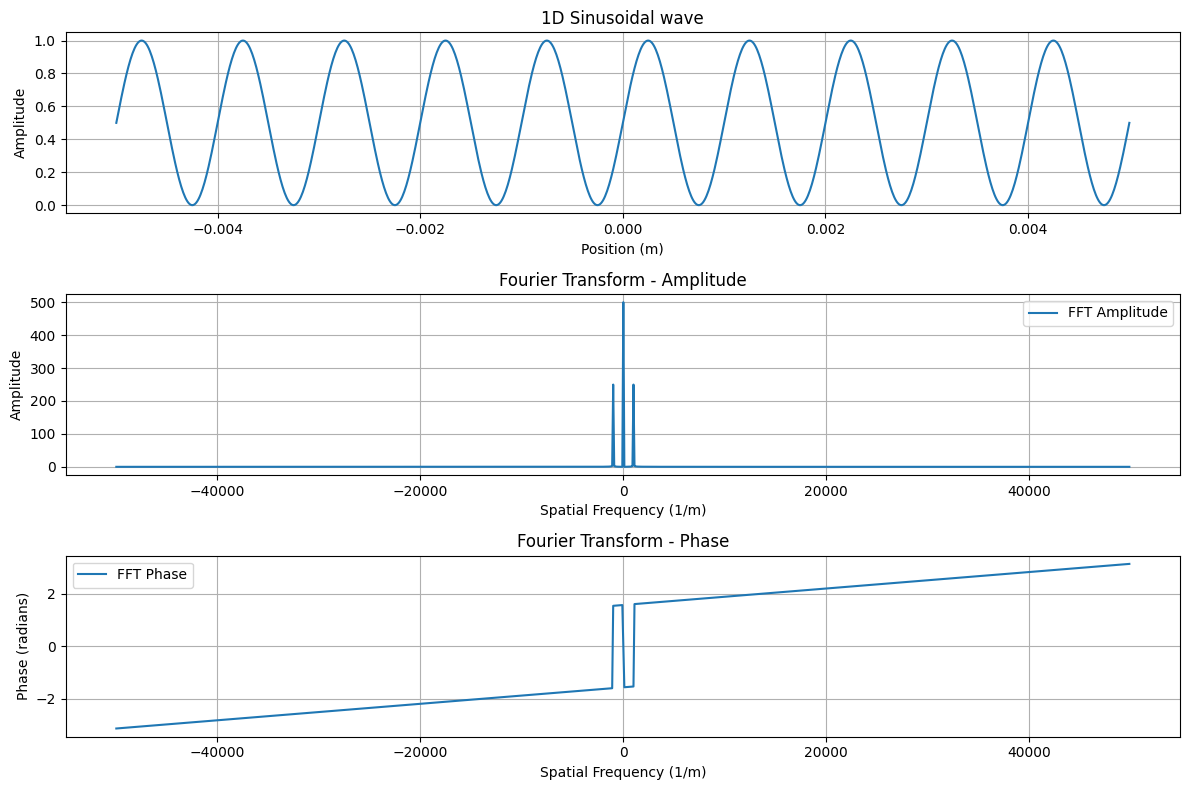

In [ ]:
grating_period = 1e-3  # meters (1 mm period)

SG=SineGrating(grating_period)
GratingPlot(SG,"1D Sinusoidal wave")


### **Square Wave Grating**

A **square wave grating** is a diffraction grating characterized by a periodic structure that alternates sharply between two levels, forming a rectangular profile. This design generates a diffraction pattern rich in harmonics, with significant energy distributed among the fundamental frequency and its odd harmonics.

The abrupt transitions in the square wave profile produce a broader range of spatial frequencies compared to sinusoidal gratings. The diffraction efficiency in a square grating depends on the groove depth and duty cycle (the ratio of high to low levels within one period).

### **Features:**
- **Profile**: Alternates sharply between two levels, forming a rectangular pattern.
- **Diffraction Characteristics**: Strong fundamental frequency with prominent odd harmonics.
- **Applications**: Optical filtering, diffractive optics, and beam splitting.

Square wave gratings are particularly useful in applications requiring multi-order diffraction or enhanced harmonic generation, offering flexibility in controlling the distribution of light energy across various diffraction orders.

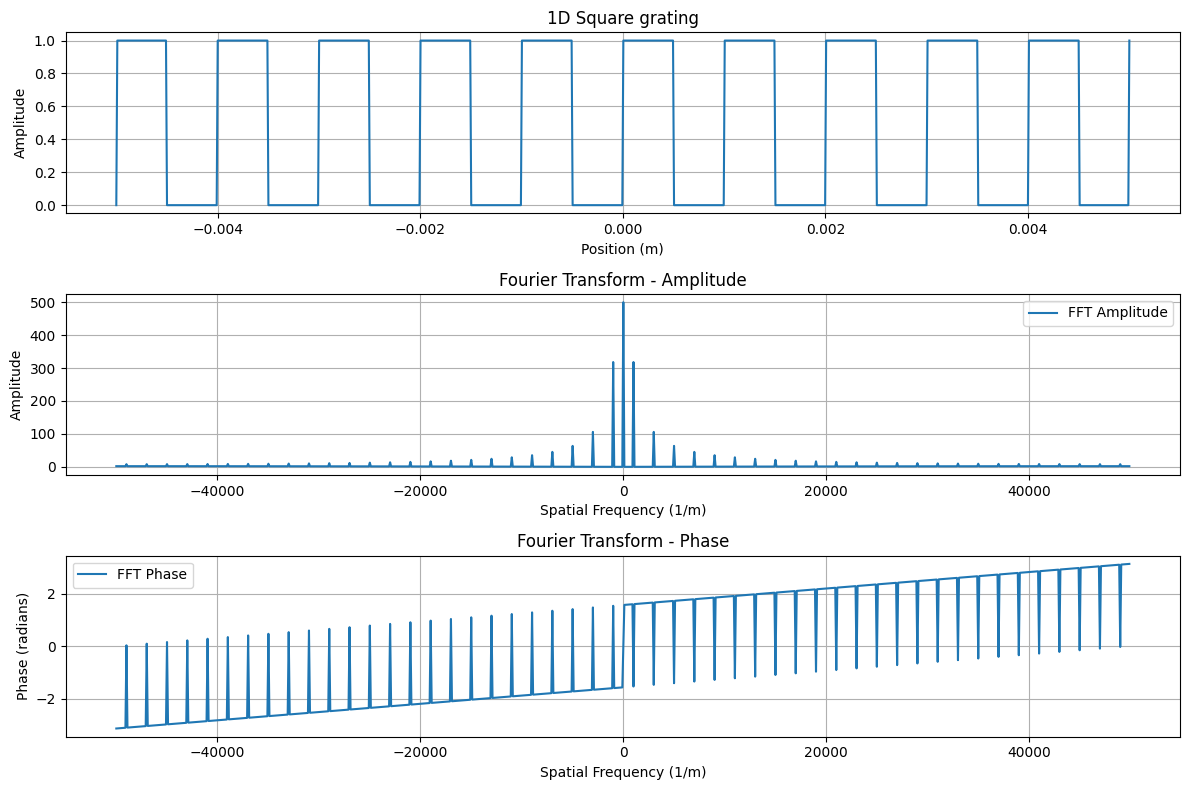

In [ ]:
grating_period = 1e-3  # meters (1 mm period)

SqG=SquareGrating(grating_period)
GratingPlot(SqG,"1D Square grating")

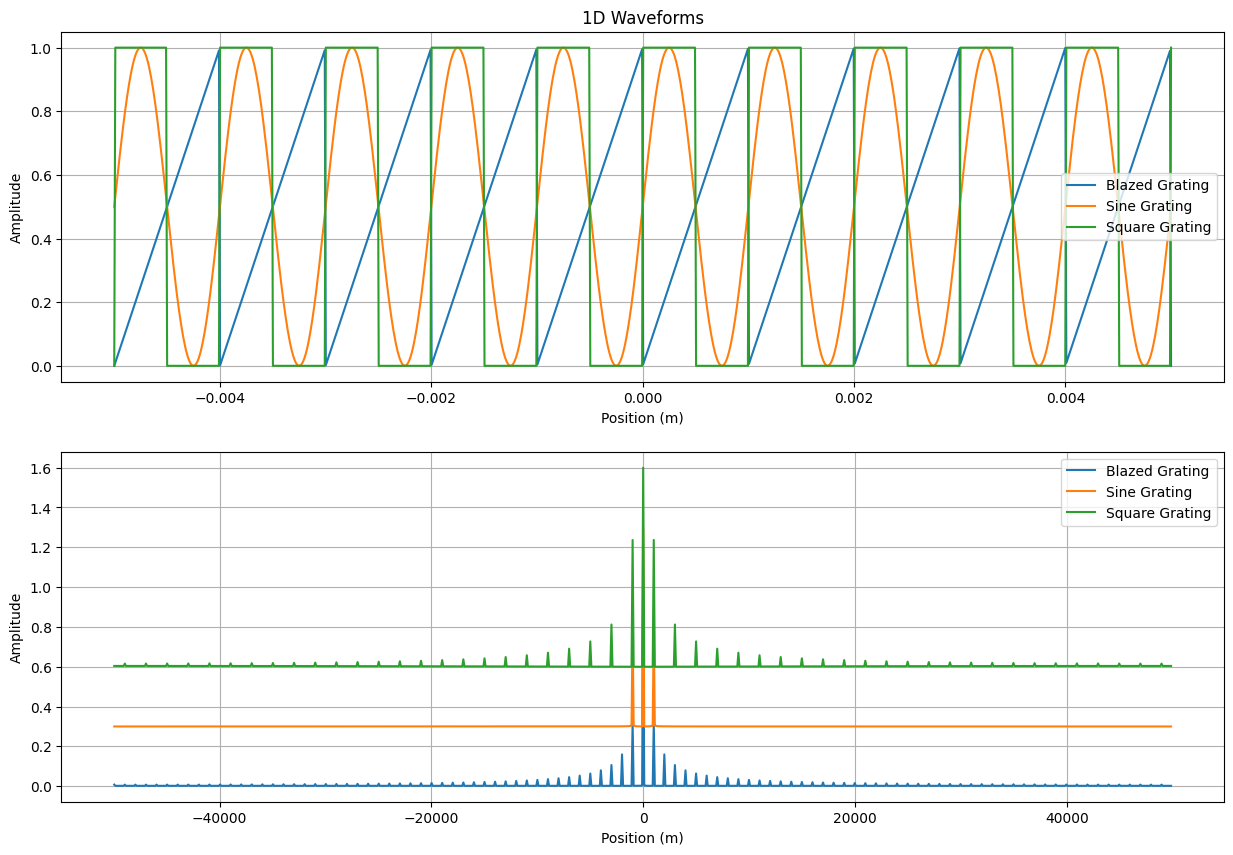

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2,1,1)
plt.plot(BG[0],BG[1],label="Blazed Grating")
plt.plot(SG[0],SG[1],label="Sine Grating")
plt.plot(SqG[0],SqG[1],label="Square Grating")
plt.title("1D Waveforms")
plt.xlabel("Position (m)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(BG[2],BG[3]/np.max(BG[3]),label="Blazed Grating")
plt.plot(SG[2],0.3+SG[3]/np.max(SG[3]),label="Sine Grating")
plt.plot(SqG[2],0.6+SqG[3]/np.max(SqG[3]),label="Square Grating")

plt.xlabel("Position (m)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

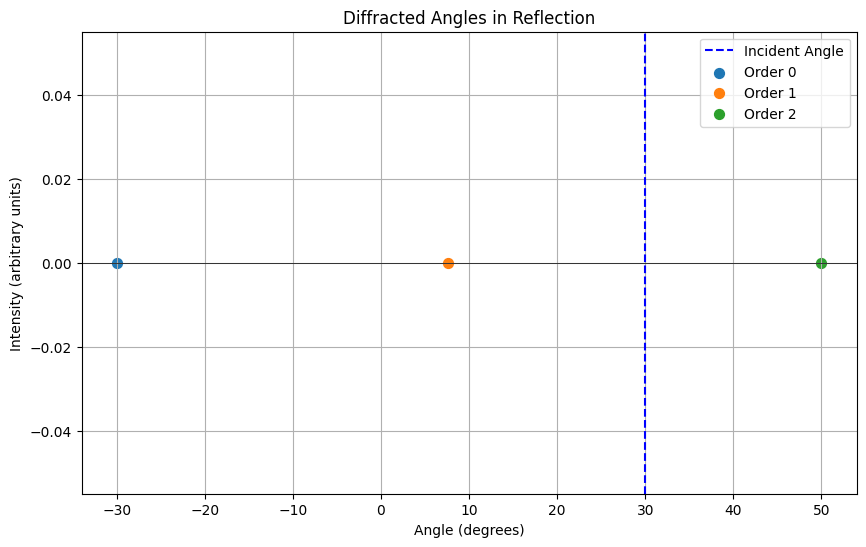

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_diffracted_angles(incident_angle_deg, wavelength, grating_period, max_order=10):
    """
    Calculate diffracted angles for given input parameters.

    :param incident_angle_deg: Incident angle in degrees.
    :param wavelength: Wavelength of light in meters.
    :param grating_period: Grating period (d) in meters.
    :param max_order: Maximum diffraction order to calculate.
    :return: A dictionary with diffraction orders as keys and diffracted angles in degrees as values.
    """
    incident_angle_rad = np.radians(incident_angle_deg)
    grating_spacing = grating_period
    diffracted_angles = {}

    for m in range(-max_order, max_order + 1):
        try:
            # Grating equation for reflection
            sin_theta_m = m * wavelength / grating_spacing - np.sin(incident_angle_rad)
            if -1 <= sin_theta_m <= 1:
                diffracted_angles[m] = np.degrees(np.arcsin(sin_theta_m))
            else:
                diffracted_angles[m] = None  # Angle not physically possible
        except ValueError:
            diffracted_angles[m] = None  # Ignore invalid orders

    return diffracted_angles

def plot_diffracted_angles(incident_angle_deg, diffracted_angles):
    """
    Plot the diffracted angles.

    :param incident_angle_deg: Incident angle in degrees.
    :param diffracted_angles: Dictionary of diffraction orders and their corresponding angles.
    """
    orders = list(diffracted_angles.keys())
    angles = list(diffracted_angles.values())

    plt.figure(figsize=(10, 6))
    plt.axvline(x=incident_angle_deg, color="blue", linestyle="--", label="Incident Angle")
    for order, angle in zip(orders, angles):
        if angle is not None:
            plt.scatter(angle, 0, label=f"Order {order}", s=50)

    plt.axhline(0, color="black", linewidth=0.5)
    plt.title("Diffracted Angles in Reflection")
    plt.xlabel("Angle (degrees)")
    plt.ylabel("Intensity (arbitrary units)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Input Parameters
incident_angle_deg = 30  # Incident angle in degrees
wavelength = 633e-9  # Wavelength in meters (e.g., 633 nm)
grating_period = 1e-6  # Grating period in meters (e.g., 1 µm)
max_order = 10  # Maximum diffraction order to calculate

# Calculate and plot diffracted angles
diffracted_angles = calculate_diffracted_angles(incident_angle_deg, wavelength, grating_period, max_order)
plot_diffracted_angles(incident_angle_deg, diffracted_angles)


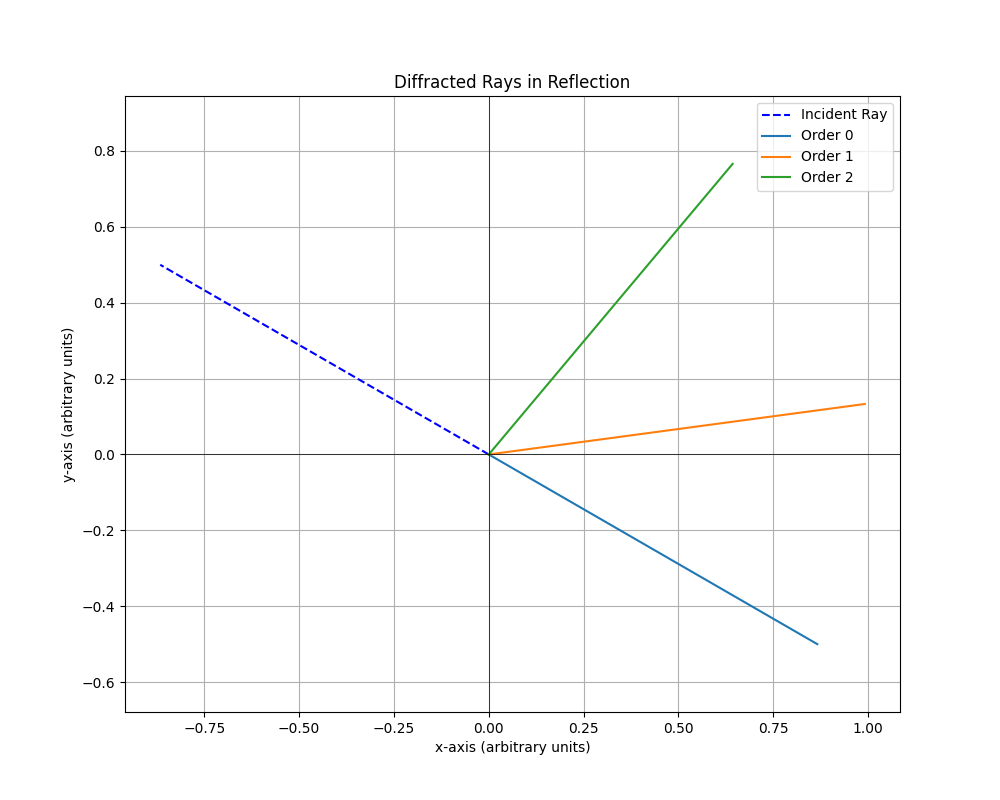

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_diffracted_angles(incident_angle_deg, wavelength, grating_period, max_order=10):
    """
    Calculate diffracted angles for given input parameters.

    :param incident_angle_deg: Incident angle in degrees.
    :param wavelength: Wavelength of light in meters.
    :param grating_period: Grating period (d) in meters.
    :param max_order: Maximum diffraction order to calculate.
    :return: A dictionary with diffraction orders as keys and diffracted angles in degrees as values.
    """
    incident_angle_rad = np.radians(incident_angle_deg)
    grating_spacing = grating_period
    diffracted_angles = {}

    for m in range(-max_order, max_order + 1):
        try:
            # Grating equation for reflection
            sin_theta_m = m * wavelength / grating_spacing - np.sin(incident_angle_rad)
            if -1 <= sin_theta_m <= 1:
                diffracted_angles[m] = np.degrees(np.arcsin(sin_theta_m))
            else:
                diffracted_angles[m] = None  # Angle not physically possible
        except ValueError:
            diffracted_angles[m] = None  # Ignore invalid orders

    return diffracted_angles

def plot_rays(incident_angle_deg, diffracted_angles):
    """
    Plot the diffracted angles as rays.

    :param incident_angle_deg: Incident angle in degrees.
    :param diffracted_angles: Dictionary of diffraction orders and their corresponding angles.
    """
    origin = [0, 0]  # Reflection point
    ray_length = 1  # Length of the rays for visualization

    plt.figure(figsize=(10, 8))

    # Plot incident ray
    incident_angle_rad = np.radians(incident_angle_deg)
    plt.plot(
        [origin[0], -ray_length * np.cos(incident_angle_rad)],
        [origin[1], ray_length * np.sin(incident_angle_rad)],
        label="Incident Ray",
        linestyle="--",
        color="blue",
    )

    # Plot reflected rays
    for order, angle_deg in diffracted_angles.items():
        if angle_deg is not None:
            angle_rad = np.radians(angle_deg)
            plt.plot(
                [origin[0], ray_length * np.cos(angle_rad)],
                [origin[1], ray_length * np.sin(angle_rad)],
                label=f"Order {order}",
            )

    # Plot settings
    plt.axhline(0, color="black", linewidth=0.5)
    plt.axvline(0, color="black", linewidth=0.5)
    plt.title("Diffracted Rays in Reflection")
    plt.xlabel("x-axis (arbitrary units)")
    plt.ylabel("y-axis (arbitrary units)")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")
    plt.show()

# Input Parameters
incident_angle_deg = 30  # Incident angle in degrees
wavelength = 633e-9  # Wavelength in meters (e.g., 633 nm)
grating_period = 1e-6  # Grating period in meters (e.g., 1 µm)
max_order = 10  # Maximum diffraction order to calculate

# Calculate and plot diffracted angles
diffracted_angles = calculate_diffracted_angles(incident_angle_deg, wavelength, grating_period, max_order)
plot_rays(incident_angle_deg, diffracted_angles)


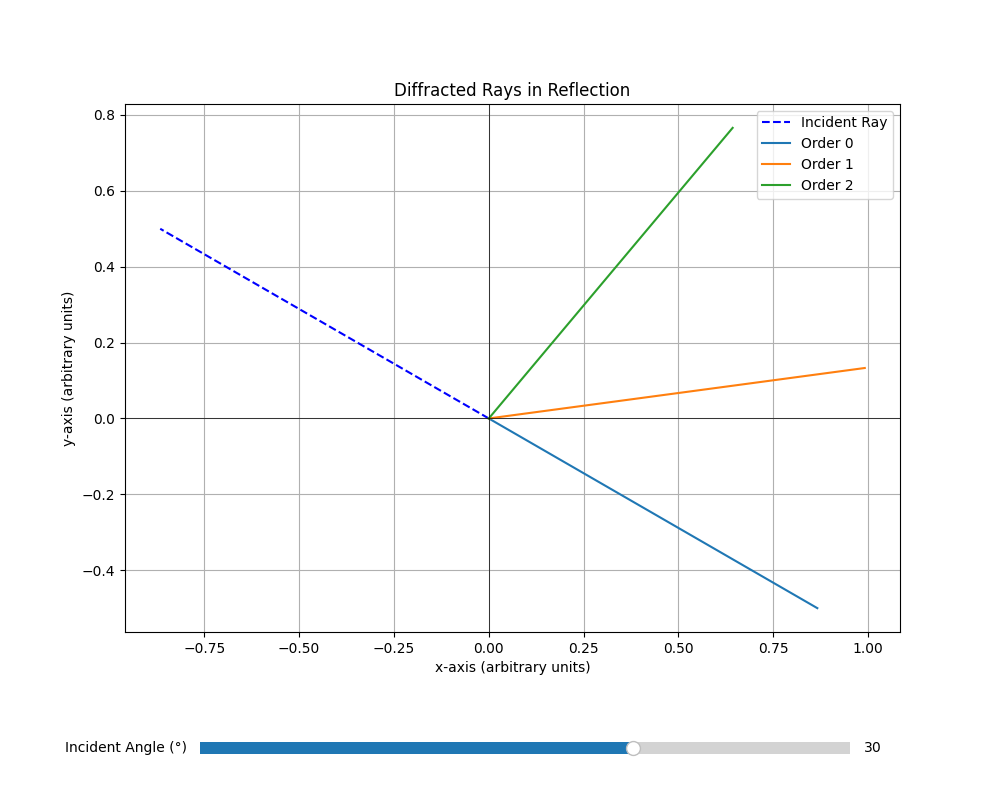

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

def calculate_diffracted_angles(incident_angle_deg, wavelength, grating_period):
    """
    Calculate diffracted angles for orders -2, -1, 0, 1, 2.

    :param incident_angle_deg: Incident angle in degrees.
    :param wavelength: Wavelength of light in meters.
    :param grating_period: Grating period (d) in meters.
    :return: A dictionary with diffraction orders as keys and diffracted angles in degrees as values.
    """
    incident_angle_rad = np.radians(incident_angle_deg)
    grating_spacing = grating_period
    diffracted_angles = {}

    for m in range(-2, 3):  # Orders -2, -1, 0, 1, 2
        sin_theta_m = m * wavelength / grating_spacing - np.sin(incident_angle_rad)
        if -1 <= sin_theta_m <= 1:
            diffracted_angles[m] = np.degrees(np.arcsin(sin_theta_m))
        else:
            diffracted_angles[m] = None  # Angle not physically possible

    return diffracted_angles

def plot_rays(ax, incident_angle_deg, diffracted_angles):
    """
    Plot the diffracted angles as rays.

    :param ax: Matplotlib axis to plot on.
    :param incident_angle_deg: Incident angle in degrees.
    :param diffracted_angles: Dictionary of diffraction orders and their corresponding angles.
    """
    origin = [0, 0]  # Reflection point
    ray_length = 1  # Length of the rays for visualization

    ax.clear()

    # Plot incident ray
    incident_angle_rad = np.radians(incident_angle_deg)
    ax.plot(
        [origin[0], -ray_length * np.cos(incident_angle_rad)],
        [origin[1], ray_length * np.sin(incident_angle_rad)],
        label="Incident Ray",
        linestyle="--",
        color="blue",
    )

    # Plot reflected rays
    for order, angle_deg in diffracted_angles.items():
        if angle_deg is not None:
            angle_rad = np.radians(angle_deg)
            ax.plot(
                [origin[0], ray_length * np.cos(angle_rad)],
                [origin[1], ray_length * np.sin(angle_rad)],
                label=f"Order {order}",
            )

    # Plot settings
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    ax.set_title("Diffracted Rays in Reflection")
    ax.set_xlabel("x-axis (arbitrary units)")
    ax.set_ylabel("y-axis (arbitrary units)")
    ax.legend()
    ax.grid(True)
    ax.set_aspect("equal")

# Input Parameters
wavelength = 633e-9  # Wavelength in meters (e.g., 633 nm)
grating_period = 1e-6  # Grating period in meters (e.g., 1 µm)

# Interactive plot
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.2)

# Initial incident angle
initial_angle = 30  # degrees
diffracted_angles = calculate_diffracted_angles(initial_angle, wavelength, grating_period)
plot_rays(ax, initial_angle, diffracted_angles)

# Slider for incident angle
ax_slider = plt.axes([0.2, 0.05, 0.65, 0.03])
slider = Slider(ax_slider, "Incident Angle (°)", -90, 90, valinit=initial_angle)

def update(val):
    incident_angle = slider.val
    diffracted_angles = calculate_diffracted_angles(incident_angle, wavelength, grating_period)
    plot_rays(ax, incident_angle, diffracted_angles)
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()
